Attribute information: 
1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
-- see the note below
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500, 
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes


reference: https://archive.ics.uci.edu/ml/datasets/Hepatitis

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#feature selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

clean_hepatitis_dataset.csv         hepatitis.csv
data/                               knn_hepB_model.pkl
decision_tree_clf_hepB_model.pkl    logistic_regression_hepB_model.pkl
hep_decisition_tree_plot.png        mortality_pred.ipynb
hep_mortality_new.ipynb


In [3]:
df = pd.read_csv('hepatitis.csv')

In [4]:
df.head(2)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1


In [5]:
#to make sure all letter in columns are small letters
df.columns = map(str.lower,df.columns)

In [6]:
#remove ?
df = df.replace('?',0)

lets understand the data

In [7]:
df.shape

(142, 20)

In [8]:
#data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           142 non-null    int64  
 1   age             142 non-null    int64  
 2   sex             142 non-null    int64  
 3   steroid         142 non-null    int64  
 4   antivirals      142 non-null    int64  
 5   fatigue         142 non-null    int64  
 6   malaise         142 non-null    int64  
 7   anorexia        142 non-null    int64  
 8   liver_big       142 non-null    int64  
 9   liver_firm      142 non-null    int64  
 10  spleen_palable  142 non-null    int64  
 11  spiders         142 non-null    int64  
 12  ascites         142 non-null    int64  
 13  varices         142 non-null    int64  
 14  bilirubin       142 non-null    float64
 15  alk_phosphate   142 non-null    int64  
 16  sgot            142 non-null    int64  
 17  albumin         142 non-null    flo

In [9]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [10]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.816901,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,0.388116,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [11]:
#looking for nan values

df.isna().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [12]:
#gender distribution in the dataset

df.sex.value_counts()

1    127
2     15
Name: sex, dtype: int64

In [13]:
#0R

from collections import Counter

Counter(df.sex)

Counter({2: 15, 1: 127})

In [14]:
#OR
#by range

df.groupby('sex').agg({'age':np.size})

,age
sex,
1,127
2,15


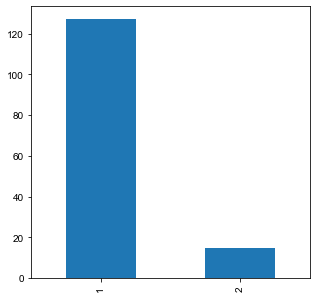

In [15]:
df.sex.value_counts().plot(kind='bar', figsize=(5,5))
plt.style.use('seaborn-whitegrid')

In [16]:
#how many alduts and etc in 
df['age_mean']  = np.where((df.age <18) ,'Teenager',
                               np.where((df.age >=18) & (df.age <=25),'Young',
                                np.where((df.age >=25) & (df.age <=40),'Adult',
                               'Old')))

In [17]:
df.age_mean.value_counts()

Old         65
Adult       63
Young       13
Teenager     1
Name: age_mean, dtype: int64

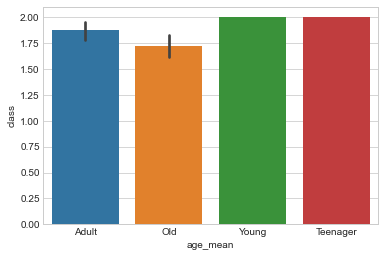

In [18]:
sns.barplot(x="age_mean", y="class", data=df)
sns.set(rc={'figure.figsize':(5,4)})
plt.show()

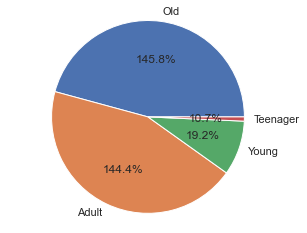

In [19]:
labels = ['Old', 'Adult','Young','Teenager']
fig1,ax1 = plt.subplots()
ax1.pie(df.age_mean.value_counts(),labels=labels,autopct='1%.1f%%',radius=2.5)
ax1.axis('equal')
plt.show()

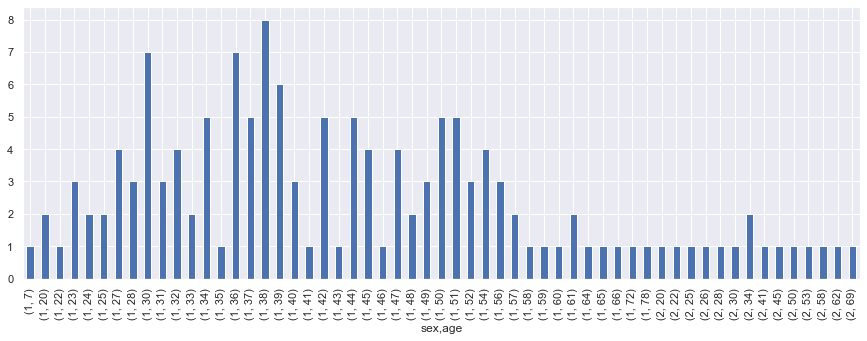

In [20]:
df.groupby(['sex','age']).size().plot(kind='bar', figsize=(15,5))
plt.show()

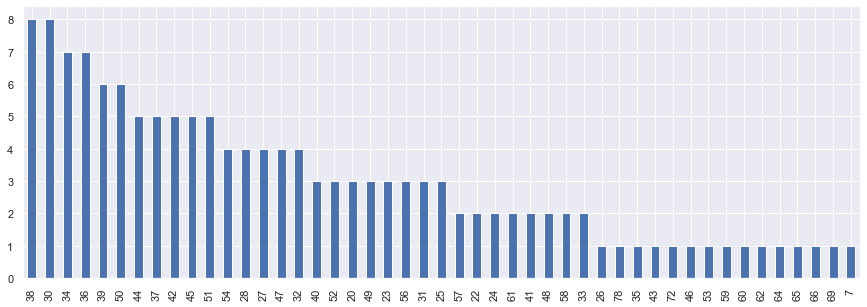

In [21]:
#graphical rep.
df.age.value_counts().plot(kind='bar',figsize=(15,5))
plt.show()

In [22]:
#lets see the age distribution by death and live

In [23]:
df.head(2)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_mean
0,2,30,2,1,2,2,2,2,1,2,...,2,2,2,1.0,85,18,4.0,61,1,Adult
1,2,50,1,1,2,1,2,2,1,2,...,2,2,2,0.9,135,42,3.5,61,1,Old


In [24]:
#lets see how many people died
df['class'].value_counts()

2    116
1     26
Name: class, dtype: int64

In [25]:
df2 = df.loc[:, ['age','sex','class']]

In [26]:
df2.head()

,age,sex,class
0,30,2,2
1,50,1,2
2,78,1,2
3,34,1,2
4,34,1,2


In [27]:
df2.groupby(['class']).size()

class
1     26
2    116
dtype: int64

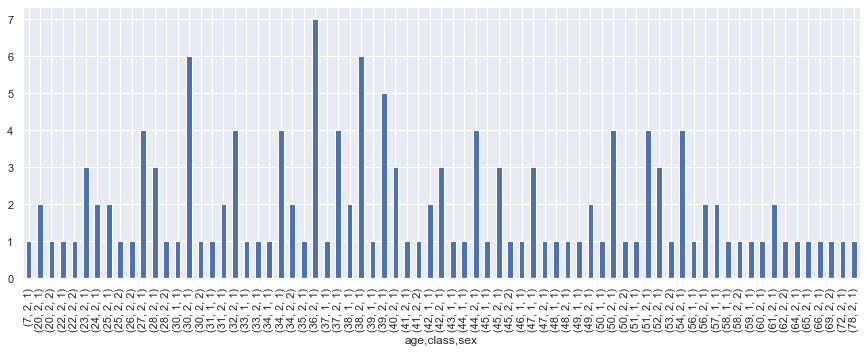

In [28]:
df2.groupby(['age','class','sex']).size().plot(kind='bar',figsize=(15,5))

In [29]:
#lets create a dictionary and map the content to values 

sex_meaning = {1:'male',
            2:'female'}
class_meaning = {1:'die',
                2:'live'}

In [30]:
#map the dict to the values in the dataframe2
df2['real_sex'] = df2.sex.map(sex_meaning)
df2['real_class'] = df2['class'].map(class_meaning)

In [31]:
#now view the new dataframe 
df2

,age,sex,class,real_sex,real_class
0,30,2,2,female,live
1,50,1,2,male,live
2,78,1,2,male,live
3,34,1,2,male,live
4,34,1,2,male,live
...,...,...,...,...,...
137,46,1,1,male,die
138,44,1,2,male,live
139,61,1,2,male,live
140,53,2,2,female,live


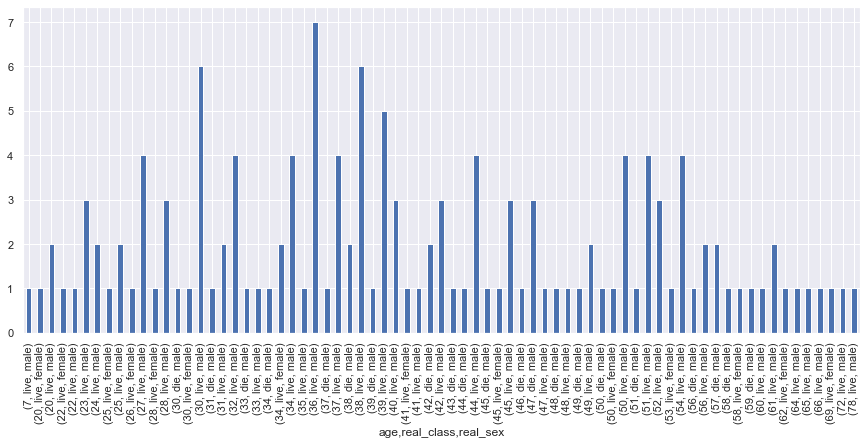

In [32]:
#age dist according to die/live ---
df2.groupby(['age','real_class','real_sex']).size().plot(kind='bar',figsize=(15,6))

In [33]:
#how died and how many lived -- both male and female 
df2.groupby(['real_class','real_sex']).size().reset_index()

,real_class,real_sex,0
0,die,male,26
1,live,female,15
2,live,male,101


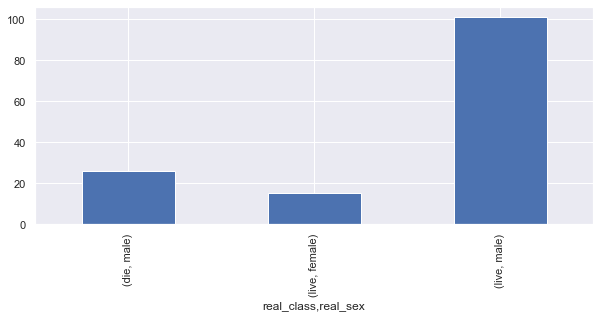

In [34]:
#visualize
df2.groupby(['real_class','real_sex']).size().plot(kind='bar',figsize=(10,4))

results

1. No female died -- 15 females lived
2. 26 males died
3. 101 males lived

In [35]:
#result check for the above -- we use the real dataset

df['class'].value_counts()

2    116
1     26
Name: class, dtype: int64

In [36]:
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.160050,0.162705,0.086206,-0.109289,0.278514,0.341807,0.166678,-0.075417,0.081185,0.188224,0.402217,0.498499,0.386317,-0.461533,-0.149718,-0.025457,0.454181,0.298737,-0.310245
age,-0.160050,1.000000,-0.028773,-0.022776,-0.044396,-0.243713,-0.033306,0.120364,-0.112006,-0.088006,-0.075270,-0.197884,-0.087715,-0.055567,0.147050,-0.030141,-0.013709,-0.216044,-0.127427,0.181512
sex,0.162705,-0.028773,1.000000,-0.032605,-0.097661,-0.066254,-0.013959,0.003602,-0.081761,-0.082179,-0.067021,-0.050403,0.126740,0.056163,-0.050150,0.039448,-0.005748,0.032088,-0.011126,-0.122436
steroid,0.086206,-0.022776,-0.032605,1.000000,0.069755,0.140436,0.225246,0.101654,0.216497,0.095238,0.067514,0.034793,-0.054713,-0.054713,-0.065891,-0.002476,-0.026080,0.178985,0.063595,-0.096067
antivirals,-0.109289,-0.044396,-0.097661,0.069755,1.000000,-0.029461,0.009982,-0.033057,0.047713,0.094782,-0.164311,-0.146747,-0.162129,-0.162129,0.169175,0.186619,0.103492,-0.161645,-0.010626,0.200227
fatigue,0.278514,-0.243713,-0.066254,0.140436,-0.029461,1.000000,0.586435,0.379249,0.114808,0.273741,0.175707,0.370594,0.276079,0.185645,-0.299168,-0.130298,-0.187825,0.293016,0.194021,-0.136702
malaise,0.341807,-0.033306,-0.013959,0.225246,0.009982,0.586435,1.000000,0.610718,0.056864,0.134330,0.027075,0.343011,0.336718,0.202660,-0.342195,-0.184377,-0.180630,0.301391,0.183469,-0.147228
anorexia,0.166678,0.120364,0.003602,0.101654,-0.033057,0.379249,0.610718,1.000000,0.086886,0.104595,0.066147,0.311883,0.189854,0.189854,-0.362389,-0.169926,-0.171502,0.174548,0.029146,-0.075028
liver_big,-0.075417,-0.112006,-0.081761,0.216497,0.047713,0.114808,0.056864,0.086886,1.000000,0.435705,0.105851,0.224966,-0.113513,-0.056556,-0.008686,-0.124866,0.043604,-0.049763,-0.066471,-0.071027
liver_firm,0.081185,-0.088006,-0.082179,0.095238,0.094782,0.273741,0.134330,0.104595,0.435705,1.000000,0.137714,0.318006,0.085249,0.173288,-0.126936,-0.348345,-0.191415,0.187444,0.049877,-0.167516


In [37]:
#checking for outliers -- in single column

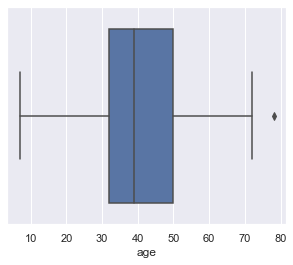

In [38]:
sns.boxplot(x='age', data=df)

In [39]:
#test the above result
def check(value):
    return df[df.age > value]

In [40]:
check(75)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_mean
2,2,78,1,2,2,1,2,2,2,2,...,2,2,2,0.7,96,32,4.0,61,1,Old


In [41]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology', 'age_mean'],
      dtype='object')

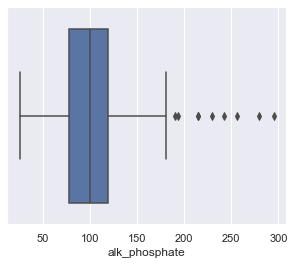

In [42]:
sns.boxplot(df['alk_phosphate'])

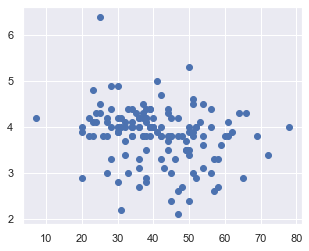

In [43]:
plt.scatter('age','albumin', data=df)

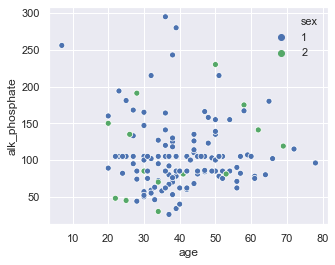

In [44]:
sns.scatterplot(x='age',y='alk_phosphate', hue='sex',palette=['b','g'], data=df)

Outliers detection

formula 1 -- Outliers = Observations > Q3 + 1.5*IQR  or  Q1 – 1.5*IQR

1. Use the interquartile range.

The interquartile range (IQR) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) in a dataset. It measures the spread of the middle 50% of values.

You could define an observation to be an outlier if it is 1.5 times the interquartile range greater than the third quartile (Q3) or 1.5 times the interquartile range less than the first quartile (Q1).

In [45]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [46]:
IQR = q3 - q1

In [47]:
IQR

class              0.00
age               18.00
sex                0.00
steroid            1.00
antivirals         0.00
fatigue            1.00
malaise            1.00
anorexia           0.00
liver_big          0.00
liver_firm         1.00
spleen_palable     0.00
spiders            1.00
ascites            0.00
varices            0.00
bilirubin          0.78
alk_phosphate     41.25
sgot              67.25
albumin            0.70
protime            9.75
histology          1.00
dtype: float64

result: age, sgot, protime, alk-phs got so many outliers

In [48]:
#data point where lies outliers
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [49]:
lower_bound = df < q1 - 1.5 * IQR
upper_bound = df > q3 + 1.5 * IQR

In [50]:
(lower_bound | upper_bound)

,age,age_mean,albumin,alk_phosphate,anorexia,antivirals,ascites,bilirubin,class,fatigue,histology,liver_big,liver_firm,malaise,protime,sex,sgot,spiders,spleen_palable,steroid,varices
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


result.. the above returns true when an outliers is detected. row two got outlier to check

In [51]:
check(75)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_mean
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1,Old


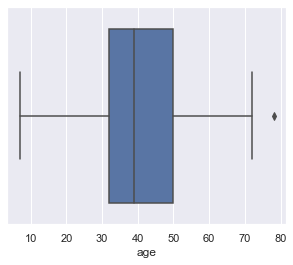

In [52]:
sns.boxplot(x='age', data=df)
plt.show()

dataframe with no outlier

In [53]:
outlier_removed = df[~(lower_bound | upper_bound).any(axis=1)]

In [54]:
outlier_removed

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_mean
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.00,61,1,Adult
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.00,75,1,Adult
6,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,85,3.81,61,1,Young
7,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,105,48,4.40,61,1,Adult
8,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,120,3.90,61,1,Adult
12,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.90,78,1,Adult
15,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.20,102,53,4.30,61,1,Old
16,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.00,63,1,Adult
22,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.90,60,63,4.70,47,1,Old
32,2,35,1,2,2,1,2,2,2,2,2,2,2,2,0.90,58,92,4.30,73,1,Adult


In [55]:
#compare to see how much was removed

outlier_removed.shape

(35, 21)

In [56]:
df.shape

(142, 21)

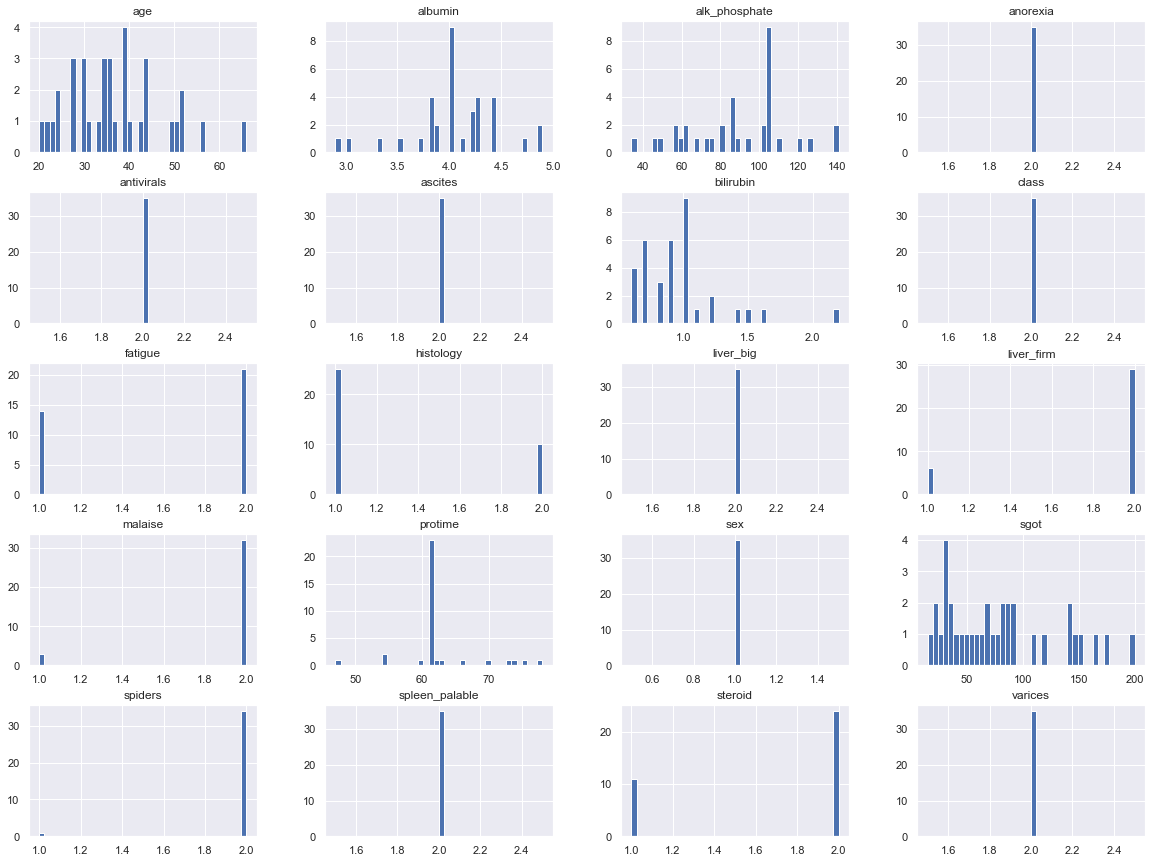

In [57]:
outlier_removed.hist(bins=40,figsize=(20,15));

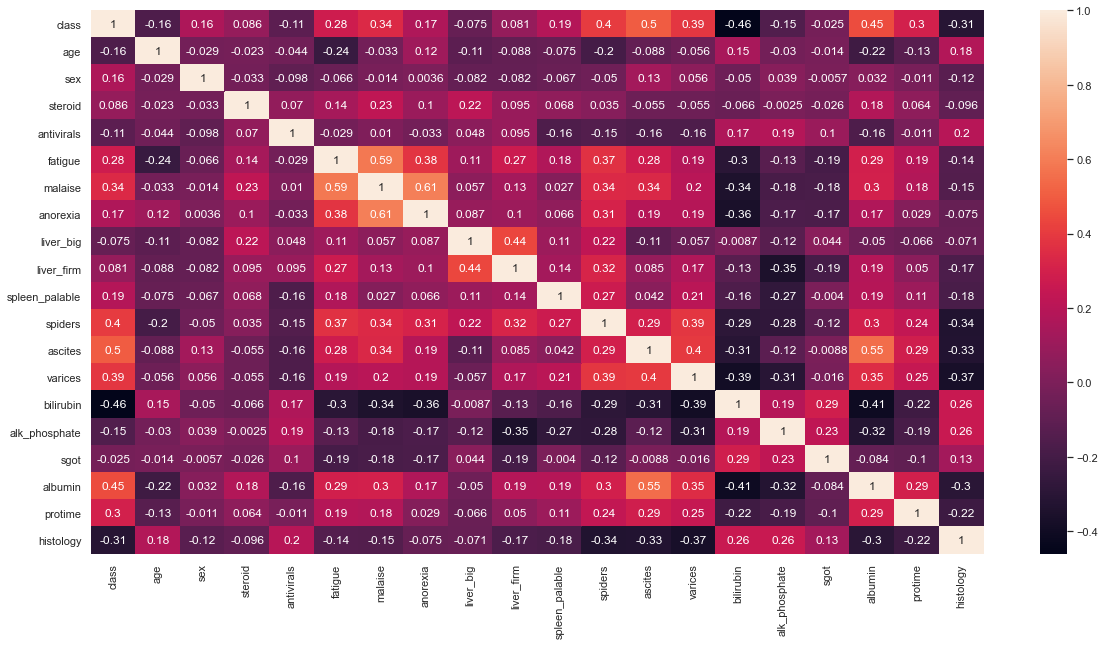

In [58]:
#initial correlation check

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

features selection

In [59]:
df3 = df.drop(['age_mean'],axis=1)

In [60]:
df3.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [61]:
#so we are trying to determine -- death or live -- meaning col- class
x_features = df3[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
y_labels = df3['class']

In [62]:
#now feature selection using skbest

skb = SelectKBest(score_func=chi2, k=10)
kb_features = skb.fit(x_features, y_labels)

In [63]:
print(kb_features.scores_)

[1.31473640e+01 3.21216780e-01 1.74104003e-01 1.25252802e-01
 1.86529185e+00 2.41384500e+00 3.57018776e-01 6.42339953e-02
 1.43448276e-01 4.28036206e-01 3.04784609e+00 1.97777149e+00
 1.18777755e+00 2.95532287e+01 6.71438752e+01 7.43268196e+00
 2.90097541e+00 6.38658314e+01 2.33681180e+00]


In [64]:
features_data = kb_features.transform(x_features)
features_data

array([[30. ,  2. ,  2. , ...,  4. , 61. ,  1. ],
       [50. ,  2. ,  2. , ...,  3.5, 61. ,  1. ],
       [78. ,  2. ,  2. , ...,  4. , 61. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1, 61. ,  2. ],
       [53. ,  2. ,  1. , ...,  4.1, 48. ,  2. ],
       [43. ,  2. ,  1. , ...,  3.1, 42. ,  2. ]])

In [65]:
#creating a dataframe with the feature scores
feature_scores = pd.DataFrame(kb_features.scores_,columns=['feature_scores'])
feature_scores

,feature_scores
0,13.147364
1,0.321217
2,0.174104
3,0.125253
4,1.865292
5,2.413845
6,0.357019
7,0.064234
8,0.143448
9,0.428036


In [66]:
#now we map the above dataframe so we can tell the feature actual name
names_of_features = pd.DataFrame(x_features.columns, columns=['feature_names'])
names_of_features

,feature_names
0,age
1,sex
2,steroid
3,antivirals
4,fatigue
5,malaise
6,anorexia
7,liver_big
8,liver_firm
9,spleen_palable


In [67]:
best_features_df = pd.concat([names_of_features,feature_scores],axis=1)
best_features_df

,feature_names,feature_scores
0,age,13.147364
1,sex,0.321217
2,steroid,0.174104
3,antivirals,0.125253
4,fatigue,1.865292
5,malaise,2.413845
6,anorexia,0.357019
7,liver_big,0.064234
8,liver_firm,0.143448
9,spleen_palable,0.428036


result - the higher the number, the more import it is for the model

In [68]:
best_features_df.nlargest(12, 'feature_scores')

,feature_names,feature_scores
14,alk_phosphate,67.143875
17,protime,63.865831
13,bilirubin,29.553229
0,age,13.147364
15,sgot,7.432682
10,spiders,3.047846
16,albumin,2.900975
5,malaise,2.413845
18,histology,2.336812
11,ascites,1.977771


In [69]:
#feature importance

ext_clf = ExtraTreesClassifier() 
ext_clf.fit(x_features,y_labels)
print(ext_clf.feature_importances_)

[0.05194756 0.01772202 0.02946615 0.00989381 0.01831367 0.04038201
 0.025061   0.02815226 0.04380613 0.03868848 0.08429891 0.11412283
 0.07283099 0.10119346 0.07995485 0.05798984 0.0701665  0.07188189
 0.04412762]


In [70]:
feat_impot_df = pd.DataFrame(ext_clf.feature_importances_, index=x_features.columns)

In [71]:
feat_impot_df

,0
age,0.051948
sex,0.017722
steroid,0.029466
antivirals,0.009894
fatigue,0.018314
malaise,0.040382
anorexia,0.025061
liver_big,0.028152
liver_firm,0.043806
spleen_palable,0.038688


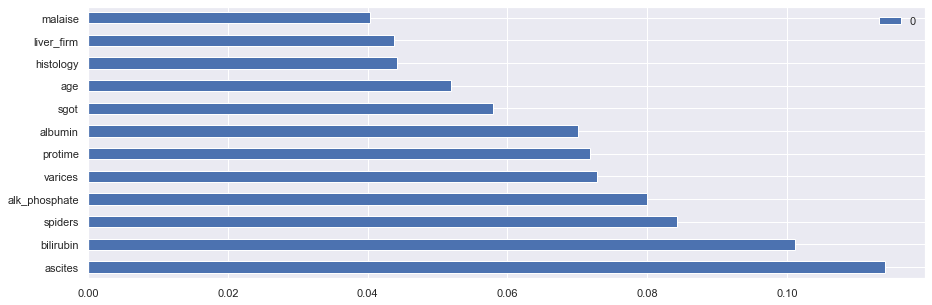

In [72]:
feat_impot_df.nlargest(12,0).plot(kind='barh', figsize=(15,5))
plt.show()

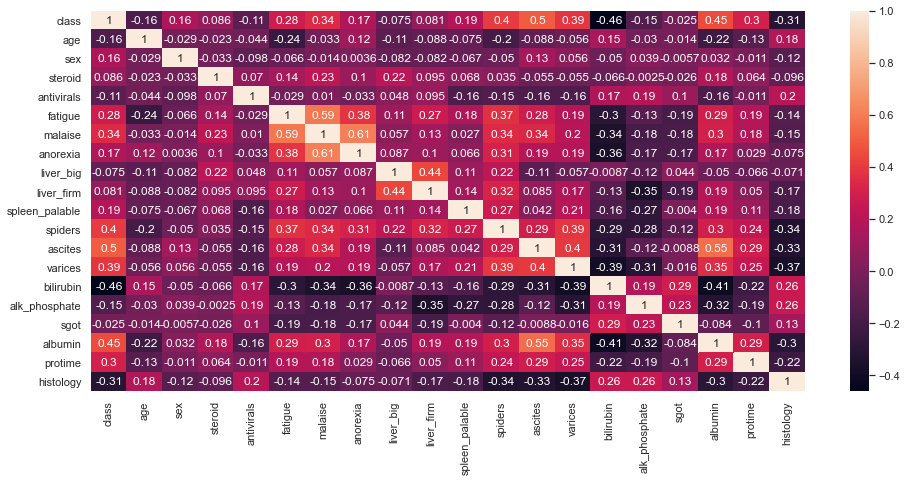

In [73]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [74]:
#correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.160050,0.162705,0.086206,-0.109289,0.278514,0.341807,0.166678,-0.075417,0.081185,0.188224,0.402217,0.498499,0.386317,-0.461533,-0.149718,-0.025457,0.454181,0.298737,-0.310245
age,-0.160050,1.000000,-0.028773,-0.022776,-0.044396,-0.243713,-0.033306,0.120364,-0.112006,-0.088006,-0.075270,-0.197884,-0.087715,-0.055567,0.147050,-0.030141,-0.013709,-0.216044,-0.127427,0.181512
sex,0.162705,-0.028773,1.000000,-0.032605,-0.097661,-0.066254,-0.013959,0.003602,-0.081761,-0.082179,-0.067021,-0.050403,0.126740,0.056163,-0.050150,0.039448,-0.005748,0.032088,-0.011126,-0.122436
steroid,0.086206,-0.022776,-0.032605,1.000000,0.069755,0.140436,0.225246,0.101654,0.216497,0.095238,0.067514,0.034793,-0.054713,-0.054713,-0.065891,-0.002476,-0.026080,0.178985,0.063595,-0.096067
antivirals,-0.109289,-0.044396,-0.097661,0.069755,1.000000,-0.029461,0.009982,-0.033057,0.047713,0.094782,-0.164311,-0.146747,-0.162129,-0.162129,0.169175,0.186619,0.103492,-0.161645,-0.010626,0.200227
fatigue,0.278514,-0.243713,-0.066254,0.140436,-0.029461,1.000000,0.586435,0.379249,0.114808,0.273741,0.175707,0.370594,0.276079,0.185645,-0.299168,-0.130298,-0.187825,0.293016,0.194021,-0.136702
malaise,0.341807,-0.033306,-0.013959,0.225246,0.009982,0.586435,1.000000,0.610718,0.056864,0.134330,0.027075,0.343011,0.336718,0.202660,-0.342195,-0.184377,-0.180630,0.301391,0.183469,-0.147228
anorexia,0.166678,0.120364,0.003602,0.101654,-0.033057,0.379249,0.610718,1.000000,0.086886,0.104595,0.066147,0.311883,0.189854,0.189854,-0.362389,-0.169926,-0.171502,0.174548,0.029146,-0.075028
liver_big,-0.075417,-0.112006,-0.081761,0.216497,0.047713,0.114808,0.056864,0.086886,1.000000,0.435705,0.105851,0.224966,-0.113513,-0.056556,-0.008686,-0.124866,0.043604,-0.049763,-0.066471,-0.071027
liver_firm,0.081185,-0.088006,-0.082179,0.095238,0.094782,0.273741,0.134330,0.104595,0.435705,1.000000,0.137714,0.318006,0.085249,0.173288,-0.126936,-0.348345,-0.191415,0.187444,0.049877,-0.167516


In [75]:
#Model building --- and testing with our normal datasets

In [76]:
x_features

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.00,61,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.50,61,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.00,61,1
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.00,61,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.00,75,1
5,51,1,1,2,1,2,1,2,2,1,1,2,2,1.42,105,85,3.81,61,1
6,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,85,3.81,61,1
7,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,105,48,4.40,61,1
8,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,120,3.90,61,1
9,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.40,85,1


In [77]:
y_labels

0      2
1      2
2      2
3      2
4      2
5      1
6      2
7      2
8      2
9      2
10     2
11     2
12     2
13     2
14     2
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     1
30     2
31     2
32     2
33     1
34     2
35     2
36     2
37     2
38     2
39     2
40     2
41     2
42     2
43     2
44     2
45     2
46     2
47     2
48     2
49     2
50     2
51     2
52     2
53     2
54     2
55     2
56     2
57     2
58     2
59     2
60     2
61     2
62     2
63     1
64     2
65     2
66     2
67     1
68     2
69     2
70     2
71     1
72     2
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     1
81     1
82     1
83     2
84     2
85     1
86     2
87     1
88     2
89     2
90     2
91     1
92     2
93     1
94     2
95     2
96     2
97     1
98     2
99     2
100    2
101    1
102    2
103    1
104    2
105    2
106    2
107    2
108    2
109    2
110    2
1

In [78]:
#using our original dataset

x_train,x_test,y_train,y_test = train_test_split(x_features, y_labels, test_size=0.30, random_state=7)

Model 1 -----

DTC

In [79]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
#check the score
clf.score(x_test,y_test)

0.813953488372093

Model 2 -------------

Using KNeighbors 

In [81]:
knn = KNeighborsClassifier(n_neighbors=3)

In [82]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
#check the score
knn.score(x_test,y_test) 

0.8604651162790697

Model 3 -------------

Logistics Regr

In [84]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [85]:
#check the score
logit.score(x_test,y_test)

0.7906976744186046

Model 4 -------------

Random Forest

In [86]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
#score
rf.score(x_test,y_test)

0.8604651162790697

In [88]:
predictions = rf.predict(x_test)

In [89]:
accrf = accuracy_score(y_test, predictions)*100
print(accrf)

86.04651162790698


Model 5 -------------

AdaBoostClf

In [90]:
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [91]:
ab.score(x_test,y_test)

0.9069767441860465

In [92]:
pred = ab.predict(x_test)
accab = accuracy_score(y_test, pred)*100
print(accab)

90.69767441860465


Model 6 ----------

GradBoostC

In [93]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predictions = gb.predict(x_test)
accgb=accuracy_score(y_test, predictions)*100
print("Accuracy of Gradient Descent Boosting (%): \n",accgb) 

Accuracy of Gradient Descent Boosting (%): 
 88.37209302325581


Using our best features -- compare results with any of above model

In [94]:
feat_impot_df.reset_index()

,index,0
0,age,0.051948
1,sex,0.017722
2,steroid,0.029466
3,antivirals,0.009894
4,fatigue,0.018314
5,malaise,0.040382
6,anorexia,0.025061
7,liver_big,0.028152
8,liver_firm,0.043806
9,spleen_palable,0.038688


In [95]:
feat_impot_df.index

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [96]:
# using kbest suggestion
c = best_features_df.nlargest(12, 'feature_scores')

In [97]:
list(c.feature_names)

['alk_phosphate',
 'protime',
 'bilirubin',
 'age',
 'sgot',
 'spiders',
 'albumin',
 'malaise',
 'histology',
 'ascites',
 'fatigue',
 'varices']

In [136]:
featuresX = df[['alk_phosphate',
 'protime',
 'bilirubin',
 'age',
 'sgot',
 'spiders',
 'albumin',
 'malaise',
 'histology',
 'ascites',
 'fatigue',
 'varices']]

labelsY = df['class']

In [137]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(featuresX,labelsY, test_size=0.30, random_state=7)

In [138]:
#we will use the ABC() -- because with our normal dataset the accuracy is 90%
abc = AdaBoostClassifier()
abc.fit(x_train_b,y_train_b)

AdaBoostClassifier()

In [139]:
#score
abc.score(x_test_b,y_test_b)

0.813953488372093

In [140]:
predx = abc.predict(x_test_b)
abcprd = accuracy_score(y_test_b,predx)*100
print(f'Accuracy score of abc is {abcprd} %')

Accuracy score of abc is 81.3953488372093 %


In [141]:
#Checking

In [142]:
predx

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [143]:
np.array(y_test_b)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2])

In [144]:
#lets try with the lowest accuracy rate from the above -- LG()
lgit = LogisticRegression()
lgit.fit(x_train_b,y_train_b)

LogisticRegression()

In [145]:
lgit.score(x_test_b,y_test_b)

0.8604651162790697

## result and compare -- result with best features and general dataset

In [146]:
logNo_bFeat = logit.score(x_test,y_test)
print(f'Accuracy score of LogR no best feature is {logNo_bFeat*100}')

Accuracy score of LogR no best feature is 79.06976744186046


In [147]:
print(f'Accuracy score of LogR with best feature is {lgit.score(x_test_b,y_test_b)} %')

Accuracy score of LogR with best feature is 0.8604651162790697 %


In [153]:
#using the feature selected on GbC

In [149]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train_b,y_train_b)


GradientBoostingClassifier()

In [150]:
gbc.score(x_test_b,y_test_b)

0.8837209302325582

In [151]:
gbc.predict(x_test_b)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2])

In [152]:
np.array(y_test_b)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2])

Basic EDA

Outlier detection and removal

Feature engineering -- selection and importance

model training and prediction using different models

conparison of results using the selected and non selected features